# Keras VGG16 Feature Extraction #


#### import necessary packages ####

In [1]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np
import os

####  Define the Feature Extraction Function ####

In [5]:
def extract_features(model, folder_path):
    # Get a list of all image files in the folder
    img_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Use list comprehension to process images and extract features
    features = []
    for img_path in img_paths:
        try:
            img = image.load_img(img_path, target_size=model.input_shape[1:3])
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)
            feature = model.predict(img_array)
            features.append(feature)
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")

    # Stack the extracted features into a single NumPy array
    features = np.vstack(features)

    return features


#### Load Pre-trained VGG16 Model and Create Feature Extraction Model ####

In [6]:
# Load the pre-trained VGG16 model with top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=True, input_shape=(224, 224, 3))  # Adjust input_shape accordingly

# Create a new model that includes only the convolutional base of VGG16
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv3').output)


#### Specify Folder Paths ####

In [7]:
# Specify folder paths for ASD and non-ASD child face image sets
asd_folder_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/ASD'
non_asd_folder_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/NON-ASD'

#### Extract Features for ASD Child Faces ####

In [8]:
# Extract features for ASD child faces
asd_features = extract_features(model, asd_folder_path)


2024-02-09 12:35:49.940089: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 150ms/step


KeyboardInterrupt: 

#### Extract Features for Non-ASD Child Faces ####

In [8]:
# Extract features for non-ASD child faces
non_asd_features = extract_features(model, non_asd_folder_path)


1/1 [==============================] - 0s 277ms/step
Error processing image /Users/isurudissanayake/Documents/Data/DATA_SET/NON-ASD/child-1617.png: cannot identify image file <_io.BytesIO object at 0x2830af1a0>
1/1 [==============================] - 0s 288ms/step
Error processing image /Users/isurudissanayake/Documents/Data/DATA_SET/NON-ASD/additional1178.png: cannot identify image file <_io.BytesIO object at 0x16b873330>
1/1 [==============================] - 0s 269ms/step


#### Save Extracted Features ####

In [9]:
# Save the extracted features for later use in training
np.save('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/VGG16/asd_features.npy', asd_features)
np.save('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/VGG16/non_asd_features.npy', non_asd_features)


# Model Training VGG16 #

#### import necessary packages ####

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import load_model

#### Load the extracted features for ASD and non-ASD child faces ####

In [10]:
asd_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/VGG16/asd_features.npy')
non_asd_features = np.load('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/VGG16/non_asd_features.npy')

#### Assign labels (1 for ASD, 0 for non-ASD) ####

In [11]:
asd_labels = np.ones(asd_features.shape[0])
non_asd_labels = np.zeros(non_asd_features.shape[0])

#### Combine features and labels ####

In [12]:
X = np.vstack([asd_features, non_asd_features])
y = np.concatenate([asd_labels, non_asd_labels])

#### Shuffle the data ####

In [13]:
X, y = shuffle(X, y, random_state=42)

#### Split the data into training and testing sets (70% training, 30% testing) ####

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Model definition ####

In [15]:
model = Sequential()
model.add(Flatten(input_shape=(14, 14, 512)))  # Adjust input shape to match the flattened features
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#### Model training ####

In [18]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
172/172 [==============================] - 18s 101ms/step - loss: 0.0200 - accuracy: 0.9924 - val_loss: 2.1856 - val_accuracy: 0.9135
Epoch 2/100
172/172 [==============================] - 18s 106ms/step - loss: 0.0246 - accuracy: 0.9882 - val_loss: 2.2063 - val_accuracy: 0.9099
Epoch 3/100
172/172 [==============================] - 18s 101ms/step - loss: 0.0266 - accuracy: 0.9918 - val_loss: 2.6377 - val_accuracy: 0.9135
Epoch 4/100
172/172 [==============================] - 17s 99ms/step - loss: 0.0321 - accuracy: 0.9893 - val_loss: 2.2172 - val_accuracy: 0.9113
Epoch 5/100
172/172 [==============================] - 17s 101ms/step - loss: 0.0407 - accuracy: 0.9840 - val_loss: 3.1578 - val_accuracy: 0.9150
Epoch 6/100
172/172 [==============================] - 17s 100ms/step - loss: 0.0433 - accuracy: 0.9862 - val_loss: 2.2323 - val_accuracy: 0.9048
Epoch 7/100
172/172 [==============================] - 17s 100ms/step - loss: 0.0437 - accuracy: 0.9867 - val_loss: 1.8126 - 

 #### Save the trained model to a file named 'VGG16Model.h5' ####

In [20]:
model.save('/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/VGG16/VGG16Model.h5')

#### Model evaluation ####

In [21]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

93/93 [==============================] - 3s 25ms/step - loss: 2.9065 - accuracy: 0.9220
Test Accuracy: 0.9220074415206909


#### Predictions ####

In [22]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype('int32')

93/93 [==============================] - 2s 23ms/step


#### Classification report ####

In [23]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      2604
         1.0       0.75      0.50      0.60       345

    accuracy                           0.92      2949
   macro avg       0.84      0.74      0.78      2949
weighted avg       0.91      0.92      0.92      2949


#### Confusion matrix ####

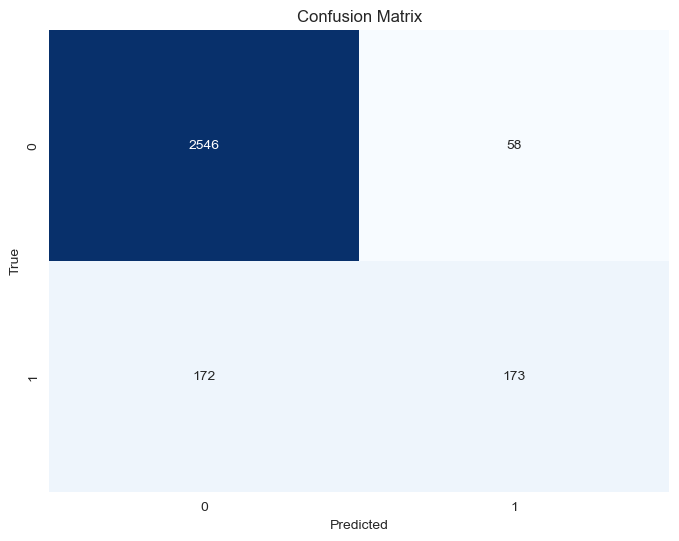

In [24]:
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Plot training history ####

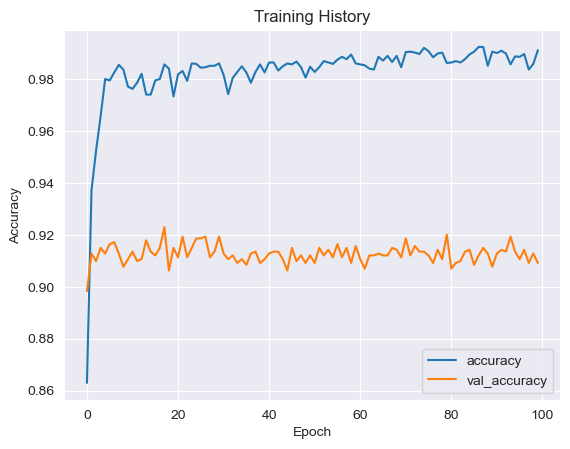

In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training History')
plt.show()

# Keras VGG16 Prediction #

#### Importing Libraries ####

In [43]:
import cv2
import os
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model, load_model


#### Defining Paths and target size ####

In [44]:
# Define paths
input_image_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/ASD/0486.jpg'  # Replace with your image path
# input_image_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/test.jpeg'  # Replace with your image path
model_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/VGG16/VGG16Model.h5'
target_size = (224, 224)

#### Load Pre-trained VGG16 Model and Create a New Model ####

In [45]:
# Load the pre-trained VGG16 model with top layers included
base_model = VGG16(weights='imagenet', include_top=True)

# Create a new model that takes the input of VGG16 and outputs the desired layer
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv3').output)


#### Process Input Image and Extract Features ####

In [46]:
# Process the input image
img = cv2.imread(input_image_path)
img = cv2.resize(img, target_size)
img = preprocess_input(np.expand_dims(image.img_to_array(img), axis=0))

# Extract features using the full VGG16 model
features = model.predict(img)  # Use the new model
# Use base_model directly for feature extraction
# features = base_model.predict(img)


1/1 [==============================] - 0s 191ms/step


#### Reshape Features and Load Trained Model ####


In [47]:
# Reshape features to match the expected input shape of trained_model
features_reshaped = np.reshape(features, (features.shape[0], 14, 14, 512))  # Reshape to (None, 14, 14, 512)

# Load the trained model
trained_model = load_model(model_path)

#### Predict ASD Probability and Interpret the Prediction ####

In [48]:
# Predict ASD probability using the trained model and extracted features
prediction = trained_model.predict(features_reshaped)[0][0]  # Access the first element for ASD probability
print("prediction: ", prediction)
print("prediction: {:.5f}".format(prediction))

# Interpret the prediction
rounded_prediction = round(prediction, 2)
print(f"Predicted probability: {rounded_prediction:.2f}")

if rounded_prediction > 0.5:
    print(f"Predicted ASD with probability: {rounded_prediction:.2f}")
else:
    print(f"Predicted non-ASD with probability: {1 - rounded_prediction:.2f}")


1/1 [==============================] - 0s 64ms/step
prediction:  1.0
prediction: 1.00000
Predicted probability: 1.00
Predicted ASD with probability: 1.00


# XAI LIME #

### Import necessary libraries ###

In [81]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from skimage.segmentation import mark_boundaries
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from PIL import Image
from pathlib import Path
from IPython.display import display
from lime.lime_image import LimeImageExplainer

### Provide the path to the image file ###

In [82]:
image_path = "/Users/isurudissanayake/Documents/Data/DATA_SET/ASD/0579.jpg"

### Provide the model path ###

In [83]:
model_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/VGG16/VGG16Model.h5'
target_size = (224, 224)

### Load the pre-trained VGG16 model with top layers included ###

In [84]:
base_model = VGG16(weights='imagenet', include_top=True)

### Take the output of the base model up to the last convolutional layer ###

In [85]:
x = base_model.get_layer('block5_pool').output

### Add a new dense layer for output ###

In [86]:
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

### Create a new model that takes the input of VGG16 and outputs the desired layer ###

In [87]:
model = Model(inputs=base_model.input, outputs=predictions)

### Process the input image ###

In [88]:
img = np.array(Image.open(image_path).resize(target_size))
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR
img = np.expand_dims(img, axis=0)  # Add a batch dimension
img = preprocess_input(img)  # Preprocess the image

### Preprocess the image for the explainer by dividing pixel values by 255 ###

In [89]:
img_scaled = img / 255.0

###  Predict ASD probability using the full VGG16 model ###

1/1 [==============================] - 0s 179ms/step
Predicted probability: 1.00
Predicted ASD with probability: 1.00


  0%|          | 0/10000 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


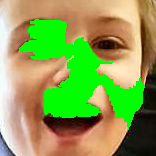

In [90]:
prediction = model.predict(img)[0][0]  # Access the first element for ASD probability

rounded_prediction = round(prediction, 2)
print(f"Predicted probability: {rounded_prediction:.2f}")

if rounded_prediction > 0.5:
    print(f"Predicted ASD with probability: {rounded_prediction:.2f}")

    explainer = LimeImageExplainer()

    # Call the function to generate and visualize explanation
    explanation = explainer.explain_instance(img_scaled[0], model.predict, top_labels=1, hide_color=0, num_samples=10000, random_seed=42)

    # Visualize the explanation using matplotlib
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)

    # Resize the explanation mask to match the original image dimensions
    mask = cv2.resize(mask, (target_size[0], target_size[1]), interpolation=cv2.INTER_NEAREST)

    # Convert the mask to the original image mode
    original_image = Image.open(image_path)
    original_width, original_height = original_image.size
    original_mode = original_image.mode

    # Overlay the explanation mask on the original image
    mask = cv2.resize(mask, (original_width, original_height), interpolation=cv2.INTER_NEAREST)
    original_image = np.array(original_image)
    original_image[mask > 0.5] = (0, 255, 0)

    # Display the original image with the explanation mask
    display(Image.fromarray(original_image))

else:
    print(f"Predicted non-ASD with probability: {1 - rounded_prediction:.2f}")

# XAI Grad CAM #

### Import necessary libraries ###

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model, load_model
import tensorflow as tf

### Define Grad-CAM function ###

In [2]:
def generate_grad_cam(model, img_array, layer_name):
    # Create a model that maps the input image to the desired layer's output
    grad_model = Model(inputs=model.input, outputs=(model.get_layer(layer_name).output, model.output))

    # Compute the gradient of the predicted class with respect to the output feature map of the given layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        predicted_class_output = preds[:, 0]  # ASD class index assuming ASD class is the first one

    grads = tape.gradient(predicted_class_output, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]

    # Compute the heatmap
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer_output), axis=-1)
    heatmap = np.maximum(heatmap, 0)  # ReLU on the heatmap
    heatmap /= np.max(heatmap)  # Normalize

    return heatmap

### Define paths ###

In [3]:
input_image_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/ASD/0649.jpg'  # Replace with your image path
model_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/VGG16/VGG16Model.h5'
target_size = (224, 224)

### Load the pre-trained VGG16 model with top layers included ###

In [4]:
base_model = VGG16(weights='imagenet', include_top=True)

### Create a new model that takes the input of VGG16 and outputs the desired layer ###

In [5]:
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv3').output)

### Process the input image ###

In [6]:
img_original = cv2.imread(input_image_path)
img_original = cv2.resize(img_original, target_size)
img_for_model = preprocess_input(np.expand_dims(img_original, axis=0))

### Extract features using the full VGG16 model ###

In [7]:
features = model.predict(img_for_model)  # Use the new model

2024-03-09 08:30:19.676729: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 272ms/step


### Reshape features to match the expected input shape of trained_model ###

In [8]:
features_reshaped = np.reshape(features, (features.shape[0], 14, 14, 512))

### Load the trained model ###

In [9]:
trained_model = load_model(model_path)

### Predict ASD probability using the trained model and extracted features ###

In [10]:
prediction = trained_model.predict(features_reshaped)[0][0]   # Access the first element for ASD probability
print("prediction: ", prediction)
print("prediction: {:.5f}".format(prediction))

1/1 [==============================] - 0s 114ms/step
prediction:  1.0
prediction: 1.00000


### Interpret the prediction and if ASD then show grad cam ###

Prediction: 1.00000
Predicted ASD with probability: 1.00


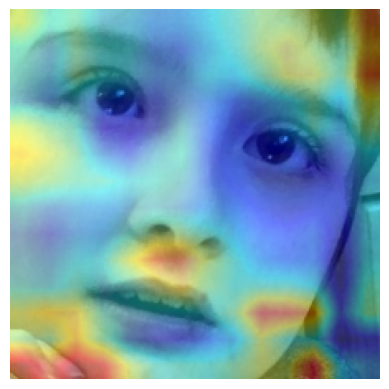

In [11]:
rounded_prediction = round(prediction, 2)
print("Prediction: {:.5f}".format(prediction))

if rounded_prediction > 0.5:
    print(f"Predicted ASD with probability: {rounded_prediction:.2f}")

    # Visualize the Grad-CAM heatmap
    heatmap = generate_grad_cam(model, img_for_model, 'block5_conv3')

    # Resize heatmap to match the size of the original image
    heatmap = cv2.resize(heatmap, (img_original.shape[1], img_original.shape[0]))

    # Apply colormap for better visualization
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Superimpose the heatmap on the original image
    superimposed_img = cv2.addWeighted(img_original, 0.6, heatmap, 0.4, 0)

    # Display the superimposed image
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

else:
    print(f"Predicted non-ASD with probability: {1 - rounded_prediction:.2f}")


2024-02-20 21:43:53.232768: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 282ms/step
Predicted probability: 0.72
Predicted ASD with probability: 0.72


  0%|          | 0/10000 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


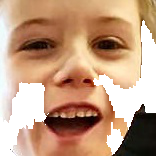

In [1]:
# import numpy as np
# import cv2
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# from skimage.segmentation import mark_boundaries
# from keras.applications.vgg16 import preprocess_input
# from tensorflow.keras.applications.vgg16 import VGG16
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
# from PIL import Image
# from pathlib import Path
# from IPython.display import display
# from lime.lime_image import LimeImageExplainer
# 
# def show_image(image):
#     # Display the image inline
#     display(Image.fromarray(image))
#     
# 
# # Provide the path to your image file
# image_path = "/Users/isurudissanayake/Documents/Data/DATA_SET/ASD/0579.jpg"
# 
# # Check if the file exists
# if Path(image_path).is_file():
#     model_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/VGG16/VGG16Model.h5'
#     target_size = (224, 224)
# 
#     # Load the pre-trained VGG16 model with top layers included
#     base_model = VGG16(weights='imagenet', include_top=True)
# 
#     # Take the output of the base model up to the last convolutional layer
#     x = base_model.get_layer('block5_pool').output
# 
#     # Add a new dense layer for output
#     x = GlobalAveragePooling2D()(x)
#     x = Dense(1024, activation='relu')(x)
#     predictions = Dense(1, activation='sigmoid')(x)
# 
#     # Create a new model that takes the input of VGG16 and outputs the desired layer
#     model = Model(inputs=base_model.input, outputs=predictions)
# 
#     # Process the input image
#     img = np.array(Image.open(image_path).resize(target_size))
#     img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR
#     img = np.expand_dims(img, axis=0)  # Add a batch dimension
#     img = preprocess_input(img)  # Preprocess the image
# 
#     # Preprocess the image for the explainer by dividing pixel values by 255
#     img_scaled = img / 255.0
# 
#     # Predict ASD probability using the full VGG16 model
#     prediction = model.predict(img)[0][0]  # Access the first element for ASD probability
# 
#     rounded_prediction = round(prediction, 2)
#     print(f"Predicted probability: {rounded_prediction:.2f}")
# 
#     if rounded_prediction > 0.5:
#         print(f"Predicted ASD with probability: {rounded_prediction:.2f}")
# 
#         explainer = LimeImageExplainer()
# 
#         # Generate an explanation for the prediction using the explainer object
#         explanation = explainer.explain_instance(img_scaled[0], model.predict, top_labels=1, hide_color=0, num_samples=10000, random_seed=42)
# 
#         # Visualize the explanation using matplotlib
#         temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
# 
#         # Resize the explanation mask to match the original image dimensions
#         mask = cv2.resize(mask, (target_size[0], target_size[1]), interpolation=cv2.INTER_NEAREST)
# 
#         # Convert the mask to the original image mode
#         original_image = Image.open(image_path)
#         #original_image = original_image.convert("L")  # Convert the original image to grayscale
#         original_width, original_height = original_image.size
#         original_mode = original_image.mode
# 
#         # Overlay the explanation mask on the original image
#         mask = cv2.resize(mask, (original_width, original_height), interpolation=cv2.INTER_NEAREST)
#         original_image = np.array(original_image)
#         original_image[mask > 0.5] = 255
# 
# 
#         
#         # Display the original image with the explanation mask
#         display(Image.fromarray(original_image))
#         # show_image(original_image)
# 
#     else:
#         print(f"Predicted non-ASD with probability: {1 - rounded_prediction:.2f}")
# else:
#     print("Error: Image file not found.")

1/1 [==============================] - 0s 163ms/step
Predicted probability: 1.00
Predicted ASD with probability: 1.00


  0%|          | 0/10000 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


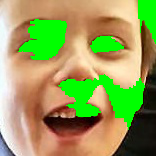

In [18]:
# import numpy as np
# import cv2
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# from skimage.segmentation import mark_boundaries
# from keras.applications.vgg16 import preprocess_input
# from tensorflow.keras.applications.vgg16 import VGG16
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
# from PIL import Image
# from pathlib import Path
# from IPython.display import display
# from lime.lime_image import LimeImageExplainer
# 
# def show_image(image):
#     # Display the image inline
#     display(Image.fromarray(image))
# 
# 
# # Provide the path to your image file
# image_path = "/Users/isurudissanayake/Documents/Data/DATA_SET/ASD/0579.jpg"
# 
# # Check if the file exists
# if Path(image_path).is_file():
#     model_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/VGG16/VGG16Model.h5'
#     target_size = (224, 224)
# 
#     # Load the pre-trained VGG16 model with top layers included
#     base_model = VGG16(weights='imagenet', include_top=True)
# 
#     # Take the output of the base model up to the last convolutional layer
#     x = base_model.get_layer('block5_pool').output
# 
#     # Add a new dense layer for output
#     x = GlobalAveragePooling2D()(x)
#     x = Dense(1024, activation='relu')(x)
#     predictions = Dense(1, activation='sigmoid')(x)
# 
#     # Create a new model that takes the input of VGG16 and outputs the desired layer
#     model = Model(inputs=base_model.input, outputs=predictions)
# 
#     # Process the input image
#     img = np.array(Image.open(image_path).resize(target_size))
#     img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR
#     img = np.expand_dims(img, axis=0)  # Add a batch dimension
#     img = preprocess_input(img)  # Preprocess the image
# 
#     # Preprocess the image for the explainer by dividing pixel values by 255
#     img_scaled = img / 255.0
# 
#     # Predict ASD probability using the full VGG16 model
#     prediction = model.predict(img)[0][0]  # Access the first element for ASD probability
# 
#     rounded_prediction = round(prediction, 2)
#     print(f"Predicted probability: {rounded_prediction:.2f}")
# 
#     if rounded_prediction > 0.5:
#         print(f"Predicted ASD with probability: {rounded_prediction:.2f}")
# 
#         explainer = LimeImageExplainer()
# 
#         # Generate an explanation for the prediction using the explainer object
#         explanation = explainer.explain_instance(img_scaled[0], model.predict, top_labels=1, hide_color=0, num_samples=10000, random_seed=42)
# 
#         # Visualize the explanation using matplotlib
#         temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
# 
#         # Resize the explanation mask to match the original image dimensions
#         mask = cv2.resize(mask, (target_size[0], target_size[1]), interpolation=cv2.INTER_NEAREST)
# 
#         # Convert the mask to the original image mode
#         original_image = Image.open(image_path)
#         #original_image = original_image.convert("L")  # Convert the original image to grayscale
#         original_width, original_height = original_image.size
#         original_mode = original_image.mode
# 
#         # Overlay the explanation mask on the original image
#         mask = cv2.resize(mask, (original_width, original_height), interpolation=cv2.INTER_NEAREST)
#         original_image = np.array(original_image)
#         original_image[mask > 0.5] = (0, 255, 0)
# 
# 
# 
#         # Display the original image with the explanation mask
#         display(Image.fromarray(original_image))
#         # show_image(original_image)
# 
#     else:
#         print(f"Predicted non-ASD with probability: {1 - rounded_prediction:.2f}")
# else:
#     print("Error: Image file not found.")

1/1 [==============================] - 0s 238ms/step
Predicted probability: 0.64
Predicted ASD with probability: 0.64


  0%|          | 0/10000 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


/var/folders/rl/rrwm4k2j0jl36rstbnx1jwfr0000gn/T/ipykernel_5498/2971085014.py:81: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = (mask > 0.5).astype(np.bool)


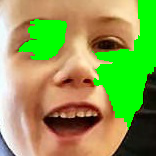

In [19]:
#   import numpy as np
# import cv2
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# from skimage.segmentation import mark_boundaries
# from keras.applications.vgg16 import preprocess_input
# from tensorflow.keras.applications.vgg16 import VGG16
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
# from PIL import Image
# from pathlib import Path
# from IPython.display import display
# from lime.lime_image import LimeImageExplainer
# 
# def show_image(image):
#     # Display the image inline
#     display(Image.fromarray(image))
# 
# 
# # Provide the path to your image file
# image_path = "/Users/isurudissanayake/Documents/Data/DATA_SET/ASD/0579.jpg"
# 
# # Check if the file exists
# if Path(image_path).is_file():
#     model_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/VGG16/VGG16Model.h5'
#     target_size = (224, 224)
# 
#     # Load the pre-trained VGG16 model with top layers included
#     base_model = VGG16(weights='imagenet', include_top=True)
# 
#     # Take the output of the base model up to the last convolutional layer
#     x = base_model.get_layer('block5_pool').output
# 
#     # Add a new dense layer for output
#     x = GlobalAveragePooling2D()(x)
#     x = Dense(1024, activation='relu')(x)
#     predictions = Dense(1, activation='sigmoid')(x)
# 
#     # Create a new model that takes the input of VGG16 and outputs the desired layer
#     model = Model(inputs=base_model.input, outputs=predictions)
# 
#     # Process the input image
#     img = np.array(Image.open(image_path).resize(target_size))
#     img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR
#     img = np.expand_dims(img, axis=0)  # Add a batch dimension
#     img = preprocess_input(img)  # Preprocess the image
# 
#     # Preprocess the image for the explainer by dividing pixel values by 255
#     img_scaled = img / 255.0
# 
#     # Predict ASD probability using the full VGG16 model
#     prediction = model.predict(img)[0][0]  # Access the first element for ASD probability
# 
#     rounded_prediction = round(prediction, 2)
#     print(f"Predicted probability: {rounded_prediction:.2f}")
# 
#     if rounded_prediction > 0.5:
#         print(f"Predicted ASD with probability: {rounded_prediction:.2f}")
# 
#         explainer = LimeImageExplainer()
# 
#         # Generate an explanation for the prediction using the explainer object
#         explanation = explainer.explain_instance(img_scaled[0], model.predict, top_labels=1, hide_color=0, num_samples=10000, random_seed=42)
# 
#         # Visualize the explanation using matplotlib
#         temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
# 
#         # Resize the explanation mask to match the original image dimensions
#         mask = cv2.resize(mask, (target_size[0], target_size[1]), interpolation=cv2.INTER_NEAREST)
# 
#         # Convert the mask to the original image mode
#         original_image = Image.open(image_path)
#         #original_image = original_image.convert("L")  # Convert the original image to grayscale
#         original_width, original_height = original_image.size
#         original_mode = original_image.mode
# 
#         # Overlay the explanation mask on the original image
#         mask = cv2.resize(mask, (original_width, original_height), interpolation=cv2.INTER_NEAREST)
# 
#         # Convert the mask to a boolean array
#         mask = (mask > 0.5).astype(np.bool)
# 
#         # Create a new image array with the same dimensions as the original image
#         new_image = np.zeros_like(original_image)
# 
#         # Overlay the explanation mask on the original image
#         new_image[mask] = (0, 255, 0)
# 
#         # Combine the original image and the explanation mask
#         combined_image = np.where(mask[..., None], new_image, original_image)
# 
#         # Display the combined image
#         display(Image.fromarray(combined_image))
# 
#     else:
#         print(f"Predicted non-ASD with probability: {1 - rounded_prediction:.2f}")
# else:
#     print("Error: Image file not found.")

1/1 [==============================] - 0s 64ms/step


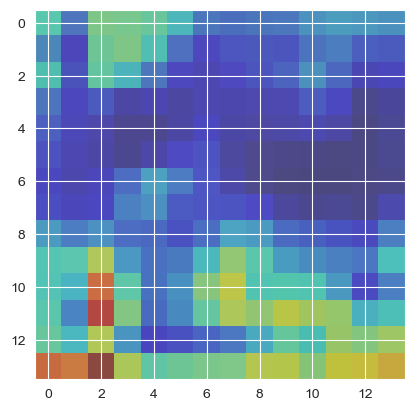

In [13]:
# import cv2
# import os
# import numpy as np
# import matplotlib.pyplot as plt
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.applications.vgg16 import preprocess_input
# from tensorflow.keras.models import Model, load_model
# import tensorflow as tf
# 
# # Define Grad-CAM function
# # Define Grad-CAM function
# def generate_grad_cam(model, img_array, layer_name):
#     # Create a model that maps the input image to the desired layer's output
#     grad_model = Model(inputs=model.input, outputs=(model.get_layer(layer_name).output, model.output))
# 
#     # Compute the gradient of the predicted class with respect to the output feature map of the given layer
#     with tf.GradientTape() as tape:
#         last_conv_layer_output, preds = grad_model(img_array)
#         predicted_class_output = preds[:, 0]  # ASD class index assuming ASD class is the first one
# 
#     grads = tape.gradient(predicted_class_output, last_conv_layer_output)
#     pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
#     last_conv_layer_output = last_conv_layer_output[0]
# 
#     # Compute the heatmap
#     heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer_output), axis=-1)
#     heatmap = np.maximum(heatmap, 0)  # ReLU on the heatmap
#     heatmap /= np.max(heatmap)  # Normalize
# 
#     return heatmap
# 
# # Define paths
# input_image_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/ASD/0486.jpg'  # Replace with your image path
# model_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/VGG16/VGG16Model.h5'
# target_size = (224, 224)
# 
# # Load the pre-trained VGG16 model with top layers included
# base_model = VGG16(weights='imagenet', include_top=True)
# 
# # Create a new model that takes the input of VGG16 and outputs the desired layer/
# model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv3').output)
# 
# # Process the input image
# img = cv2.imread(input_image_path)
# img_original = img.copy()  # Save a copy for visualization later
# img = cv2.resize(img, target_size)
# img_for_model = preprocess_input(np.expand_dims(image.img_to_array(img), axis=0))
# 
# # Extract features using the full VGG16 model
# features = model.predict(img_for_model)  # Use the new model
# 
# # Reshape features to match the expected input shape of trained_model
# features_reshaped = np.reshape(features, (features.shape[0], 14, 14, 512))  # Reshape to (None, 14, 14, 512)
# 
# # Load the trained model
# trained_model = load_model(model_path)
# 
# # Predict ASD probability using the trained model and extracted features
# prediction = trained_model.predict(features_reshaped)
# 
# # Visualize the Grad-CAM heatmap
# heatmap = generate_grad_cam(model, img_for_model, 'block5_conv3')
# plt.imshow(img_original)
# plt.imshow(heatmap, alpha=0.5, cmap='jet')
# plt.show()

1/1 [==============================] - 0s 52ms/step
prediction:  1.0
prediction: 1.00000
Predicted probability: 1.00
Predicted ASD with probability: 1.00


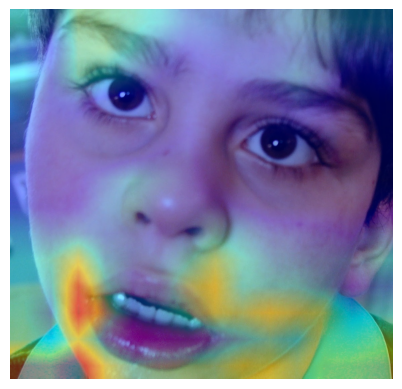

In [14]:
# import cv2
# import os
# import numpy as np
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.applications.vgg16 import preprocess_input
# from tensorflow.keras.models import Model, load_model
# 
# # Define Grad-CAM function
# def generate_grad_cam(model, img_array, layer_name):
#     # Create a model that maps the input image to the desired layer's output
#     grad_model = Model(inputs=model.input, outputs=(model.get_layer(layer_name).output, model.output))
# 
#     # Compute the gradient of the predicted class with respect to the output feature map of the given layer
#     with tf.GradientTape() as tape:
#         last_conv_layer_output, preds = grad_model(img_array)
#         predicted_class_output = preds[:, 0]  # ASD class index assuming ASD class is the first one
# 
#     grads = tape.gradient(predicted_class_output, last_conv_layer_output)
#     pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
#     last_conv_layer_output = last_conv_layer_output[0]
# 
#     # Compute the heatmap
#     heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer_output), axis=-1)
#     heatmap = np.maximum(heatmap, 0)  # ReLU on the heatmap
#     heatmap /= np.max(heatmap)  # Normalize
# 
#     return heatmap
# 
# # Define paths
# input_image_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/ASD/0486.jpg'  # Replace with your image path
# # input_image_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/test.jpeg'  # Replace with your image path
# model_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/VGG16/VGG16Model.h5'
# target_size = (224, 224)
# 
# # Load the pre-trained VGG16 model with top layers included
# base_model = VGG16(weights='imagenet', include_top=True)
# 
# # Create a new model that takes the input of VGG16 and outputs the desired layer/
# model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv3').output)
# 
# # Process the input image
# img = cv2.imread(input_image_path)
# img = cv2.resize(img, target_size)
# img = preprocess_input(np.expand_dims(image.img_to_array(img), axis=0))
# 
# # Extract features using the full VGG16 model
# features = model.predict(img)  # Use the new model
# # Use base_model directly for feature extraction
# # features = base_model.predict(img)
# 
# # Reshape features to match the expected input shape of trained_model
# features_reshaped = np.reshape(features, (features.shape[0], 14, 14, 512))  # Reshape to (None, 14, 14, 512)
# 
# # Load the trained model
# trained_model = load_model(model_path)
# 
# # Predict ASD probability using the trained model and extracted features
# prediction = trained_model.predict(features_reshaped)[0][0]  # Access the first element for ASD probability
# print("prediction: ", prediction)
# print("prediction: {:.5f}".format(prediction))
# 
# # Interpret the prediction
# rounded_prediction = round(prediction, 2)
# print(f"Predicted probability: {rounded_prediction:.2f}")
# 
# if rounded_prediction > 0.5:
#     print(f"Predicted ASD with probability: {rounded_prediction:.2f}")
# 
#     # Visualize the Grad-CAM heatmap
#     heatmap = generate_grad_cam(model, img_for_model, 'block5_conv3')
# 
#     # Resize heatmap to match the size of the original image
#     heatmap = cv2.resize(heatmap, (img_original.shape[1], img_original.shape[0]))
# 
#     # Apply colormap for better visualization
#     heatmap = np.uint8(255 * heatmap)
#     heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
# 
#     # Superimpose the heatmap on the original image
#     superimposed_img = cv2.addWeighted(img_original, 0.6, heatmap, 0.4, 0)
# 
#     # Display the superimposed image
#     plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
#     plt.axis('off')
#     plt.show()
# 
# else:
#     print(f"Predicted non-ASD with probability: {1 - rounded_prediction:.2f}")

1/1 [==============================] - 0s 179ms/step


2024-02-27 23:18:25.172339: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 55ms/step
Prediction: 1.00000
Predicted ASD with probability: 1.00


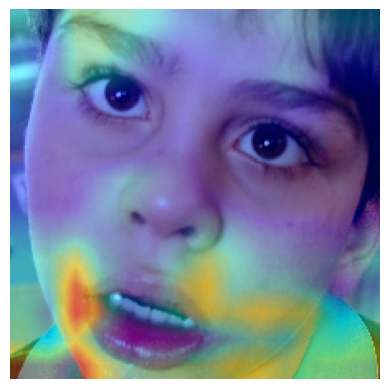

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model, load_model
import tensorflow as tf

# Define Grad-CAM function
def generate_grad_cam(model, img_array, layer_name):
    # Create a model that maps the input image to the desired layer's output
    grad_model = Model(inputs=model.input, outputs=(model.get_layer(layer_name).output, model.output))

    # Compute the gradient of the predicted class with respect to the output feature map of the given layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        predicted_class_output = preds[:, 0]  # ASD class index assuming ASD class is the first one

    grads = tape.gradient(predicted_class_output, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]

    # Compute the heatmap
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer_output), axis=-1)
    heatmap = np.maximum(heatmap, 0)  # ReLU on the heatmap
    heatmap /= np.max(heatmap)  # Normalize

    return heatmap

# Define paths
input_image_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/ASD/0486.jpg'  # Replace with your image path
model_path = '/Users/isurudissanayake/Documents/Data/DATA_SET/Feature-Extraction/VGG16/VGG16Model.h5'
target_size = (224, 224)

# Load the pre-trained VGG16 model with top layers included
base_model = VGG16(weights='imagenet', include_top=True)

# Create a new model that takes the input of VGG16 and outputs the desired layer/
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv3').output)

# Process the input image
img_original = cv2.imread(input_image_path)
img_original = cv2.resize(img_original, target_size)
img_for_model = preprocess_input(np.expand_dims(img_original, axis=0))

# Extract features using the full VGG16 model
features = model.predict(img_for_model)  # Use the new model

# Reshape features to match the expected input shape of trained_model
features_reshaped = np.reshape(features, (features.shape[0], 14, 14, 512))  # Reshape to (None, 14, 14, 512)

# Load the trained model
trained_model = load_model(model_path)

# Predict ASD probability using the trained model and extracted features
prediction = trained_model.predict(features_reshaped)[0][0]  # Access the first element for ASD probability

# Interpret the prediction
rounded_prediction = round(prediction, 2)
print("Prediction: {:.5f}".format(prediction))

if rounded_prediction > 0.5:
    print(f"Predicted ASD with probability: {rounded_prediction:.2f}")

    # Visualize the Grad-CAM heatmap
    heatmap = generate_grad_cam(model, img_for_model, 'block5_conv3')

    # Resize heatmap to match the size of the original image
    heatmap = cv2.resize(heatmap, (img_original.shape[1], img_original.shape[0]))

    # Apply colormap for better visualization
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Superimpose the heatmap on the original image
    superimposed_img = cv2.addWeighted(img_original, 0.6, heatmap, 0.4, 0)

    # Display the superimposed image
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

else:
    print(f"Predicted non-ASD with probability: {1 - rounded_prediction:.2f}")
